Importing the Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data Collection and Processing

In [5]:
# loading the data from csv file to Pandas DataFrame
big_mart_data = pd.read_csv("Testsales.csv")

In [6]:
# first 5 rows of the dataframe
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
# first 5 rows of the dataframe
big_mart_data.shape

(5681, 11)

In [8]:
# getting some information about thye dataset
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [9]:

big_mart_data["Item_Type"].value_counts()

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

In [10]:
big_mart_data["Outlet_Type"].value_counts()

Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: Outlet_Type, dtype: int64

In [11]:
big_mart_data["Outlet_Identifier"].value_counts()

OUT027    624
OUT013    621
OUT049    620
OUT046    620
OUT035    620
OUT045    619
OUT018    618
OUT017    617
OUT010    370
OUT019    352
Name: Outlet_Identifier, dtype: int64

In [12]:
big_mart_data["Outlet_Size"].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [14]:
#Getting all the feature names
big_mart_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [15]:
# checking for missing values
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [16]:
# mean value of "Item_Weight" column
big_mart_data['Item_Weight'].mean()

12.695633368756374

In [17]:
# filling the missing values in "Item_weight column" with "Mean" value
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace=True)

In [18]:
# mode of "Outlet_Size" column
big_mart_data['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [19]:
# filling the missing values in "Outlet_Size" column with Mode
mode_of_Outlet_size = big_mart_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [20]:
miss_values = big_mart_data['Outlet_Size'].isnull()

In [21]:
print(miss_values)

0       False
1        True
2        True
3        True
4       False
        ...  
5676    False
5677    False
5678     True
5679     True
5680     True
Name: Outlet_Size, Length: 5681, dtype: bool


In [22]:
big_mart_data.loc[miss_values, 'Outlet_Size'] = big_mart_data.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [23]:
# checking for missing values
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

Data Analysis

In [24]:
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.245189,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.695633,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


Numerical Features

C:\Users\kamakshi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


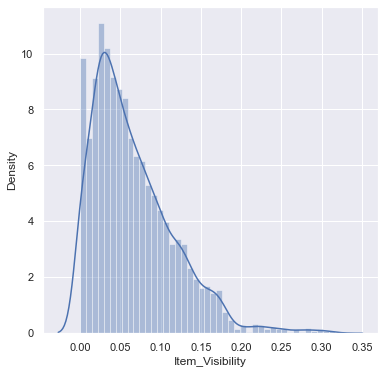

In [25]:
sns.set()
# Item Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Visibility'])
plt.show()

C:\Users\kamakshi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


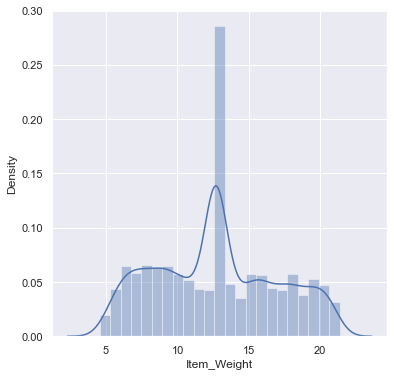

In [26]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Weight'])
plt.show()

C:\Users\kamakshi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


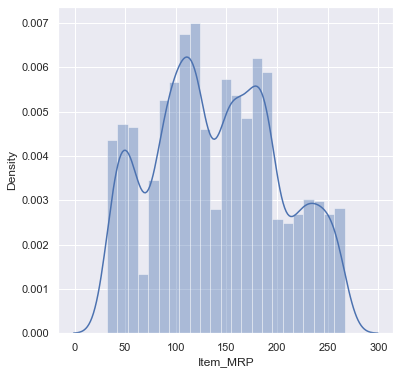

In [27]:
# Item MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_MRP'])
plt.show()

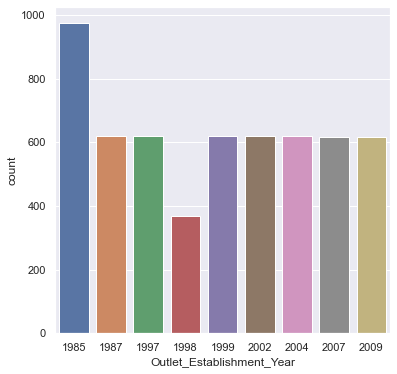

In [29]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=big_mart_data)
plt.show()

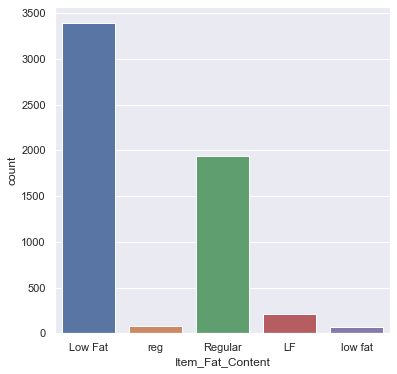

In [30]:
# Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=big_mart_data)
plt.show()

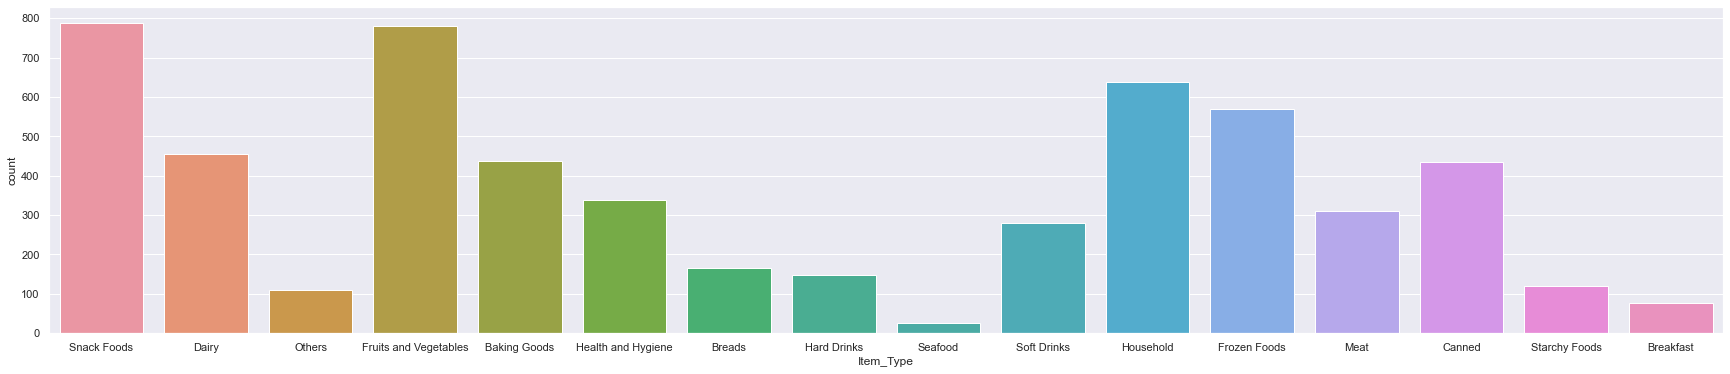

In [31]:
# Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=big_mart_data)
plt.show()

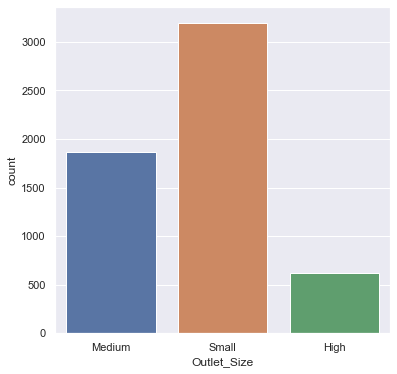

In [32]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=big_mart_data)
plt.show()

Outlier Analysis

<AxesSubplot:ylabel='Item_Weight'>

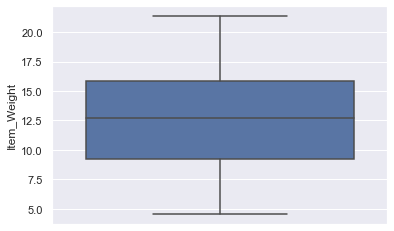

In [33]:
sns.boxplot(y="Item_Weight", data=big_mart_data)

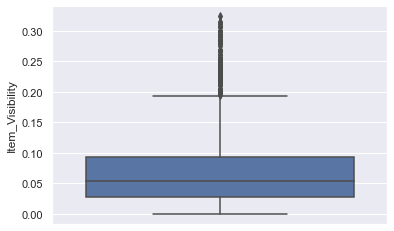

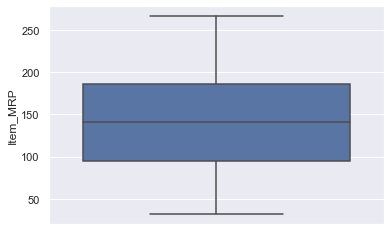

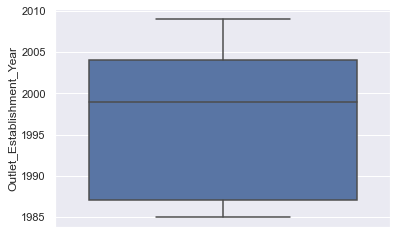

In [34]:
col=["Item_Visibility","Item_MRP","Outlet_Establishment_Year"]
for c in col:
  plt.figure()
  sns.boxplot(y=c,data=big_mart_data)

Data Pre-Processing

In [35]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [37]:
big_mart_data['Item_Fat_Content'].value_counts()


Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [38]:
big_mart_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [39]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [40]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
big_mart_data["Item_Identifier"]=encoder.fit_transform(big_mart_data["Item_Identifier"])
big_mart_data["Item_Identifier"]

0       1103
1       1067
2       1406
3        809
4       1184
        ... 
5676     231
5677     306
5678    1412
5679     517
5680     987
Name: Item_Identifier, Length: 5681, dtype: int32

In [55]:
col=["Item_Fat_Content","Item_Type","Outlet_Identifier","Outlet_Size","Outlet_Location_Type","Outlet_Type"]
for c in col:
  big_mart_data[c]=encoder.fit_transform(big_mart_data[c])
big_mart_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,2,1,1
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,2,2,0
3,809,7.315000,0,0.015388,13,155.0340,2,2007,2,1,1
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500000,1,0.013496,13,141.3154,8,1997,2,0,1
5677,306,7.600000,1,0.142991,15,169.1448,3,2009,1,2,2
5678,1412,10.000000,0,0.073529,8,118.7440,7,2002,2,1,1
5679,517,15.300000,1,0.000000,3,214.6218,2,2007,2,1,1


In [56]:
X = big_mart_data.drop(columns='Outlet_Size', axis=1)
Y = big_mart_data['Outlet_Type']

In [57]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                1103    20.750000                 0         0.007565   
1                1067     8.300000                 1         0.038428   
2                1406    14.600000                 0         0.099575   
3                 809     7.315000                 0         0.015388   
4                1184    12.695633                 1         0.118599   
...               ...          ...               ...              ...   
5676              231    10.500000                 1         0.013496   
5677              306     7.600000                 1         0.142991   
5678             1412    10.000000                 0         0.073529   
5679              517    15.300000                 1         0.000000   
5680              987     9.500000                 1         0.104720   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0            13  107.8622                  9    

In [58]:
print(Y)

0       1
1       1
2       0
3       1
4       3
       ..
5676    1
5677    2
5678    1
5679    1
5680    1
Name: Outlet_Type, Length: 5681, dtype: int64


Splitting the data into Training data & Testing Data

Linear Regression Model

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(5681, 10) (4544, 10) (1137, 10)


In [61]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [62]:
reg.coef_

array([ 1.12254088e-15,  2.86334611e-16,  1.64906504e-16, -5.68286441e-16,
       -8.87868011e-16, -6.65236886e-16, -7.28833331e-16,  1.36441996e-15,
        4.04207699e-16,  8.04321117e-01])

In [63]:
reg.intercept_

1.2046654929577465

Evaluation Linear regression model

In [64]:
Y_trainpred=reg.predict(X_train)
Y_trainpred

array([ 3.00000000e+00, -2.22044605e-15,  1.00000000e+00, ...,
        3.00000000e+00,  1.00000000e+00,  1.00000000e+00])

In [65]:
Y_train

1957    3
2167    0
821     1
4670    1
5094    1
       ..
3335    1
1099    2
2514    3
3606    1
2575    1
Name: Outlet_Type, Length: 4544, dtype: int64

In [66]:
from sklearn import metrics
metrics.mean_squared_error(Y_train,Y_trainpred)

6.583417179208434e-30

In [67]:
np.sqrt(metrics.mean_squared_error(Y_train,Y_trainpred))

2.5658170587959763e-15

In [68]:
r2_train=metrics.r2_score(Y_train,Y_trainpred)
r2_train

1.0

In [69]:
Y_testpred=reg.predict(X_test)
Y_testpred

array([-6.66133815e-16,  1.00000000e+00,  1.00000000e+00, ...,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00])

In [70]:
Y_test

3746    0
4342    1
3682    1
3944    2
1660    1
       ..
4239    2
5346    0
739     1
3475    1
4068    1
Name: Outlet_Type, Length: 1137, dtype: int64

In [71]:
metrics.mean_squared_error(Y_test,Y_testpred)

6.022804709675098e-30

In [72]:
np.sqrt(metrics.mean_squared_error(Y_test,Y_testpred))

2.4541403198829315e-15

In [73]:
r2_test=metrics.r2_score(Y_test,Y_testpred)
r2_test

1.0

In [74]:
lr_accuracy = round(reg.score(X_train,Y_train) * 100,2)
lr_accuracy

100.0

Random Forest Model

In [75]:
from sklearn.ensemble import RandomForestRegressor
rfc=RandomForestRegressor(n_estimators=100,random_state=0)
rfc.fit(X_train,Y_train)

RandomForestRegressor(random_state=0)

In [76]:
Y_pred2=rfc.predict(X_test)
Y_pred2

array([0., 1., 1., ..., 1., 1., 1.])

In [77]:
Y_test

3746    0
4342    1
3682    1
3944    2
1660    1
       ..
4239    2
5346    0
739     1
3475    1
4068    1
Name: Outlet_Type, Length: 1137, dtype: int64

Evaluation of Random forest model

In [79]:
metrics.mean_squared_error(Y_test,Y_pred2)

0.0

In [80]:
np.sqrt(metrics.mean_squared_error(Y_test,Y_pred2))

0.0

In [81]:
r2_test=metrics.r2_score(Y_test,Y_pred2)
r2_test

1.0

In [82]:
rf_accuracy = round(rfc.score(X_train,Y_train),2)
rf_accuracy

1.0

Decision Tree Model

In [83]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=15,min_samples_leaf=300)
regressor.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=300)

In [84]:
# Predicting the test set results
y_pred = regressor.predict(X_test)
y_pred

array([0., 1., 1., ..., 1., 1., 1.])

Evaluation of Decision tree mode

In [85]:
metrics.mean_squared_error(Y_test,y_pred)

0.0

In [86]:
np.sqrt(metrics.mean_squared_error(Y_test,y_pred))

0.0

In [87]:
r2_test=metrics.r2_score(Y_test,y_pred)
r2_test

1.0

In [88]:
tree_accuracy = round(regressor.score(X_train,Y_train),2)
tree_accuracy


1.0